<a href="https://colab.research.google.com/github/Jeyaa-NKS/Sleep-Apnea-Detection/blob/main/sleep_apnea_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy tensorflow scikit-learn


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/ApneaData.csv")
column_names = data.columns[0].split()
print(column_names)

['-13', '-16', '-18', '-12', '-13', '-14', '-14', '-13', '-18', '-15', '-13', '-16', '-14', '-13', '-19', '-16', '-15', '-16', '-16', '-12', '-6', '7', '10', '23', '49', '27', '12', '0', '-2', '-26', '-34', '-31', '-32', '-34', '-35', '22', '133', '228', '145', '-24', '-135', '-122', '-60', '-34', '-31', '-25', '-25', '-18', '-19', '-23', '-13', '-8', '1', '-8', '-3', '0', '11', '13', '14', '28', '30', '30', '36', '32', '37', '41', '37', '39', '35', '25', '22', '20', '9', '12', '-1', '3', '0', '6', '0', '-1', '1', '0', '-3', '-9', '-8', '-5', '-12', '-9', '-5', '-11', '-16', '-4', '-18', '-12', '-10', '-10', '-9', '-25', '-10', '-14', '-17', '-13', '-21', '-19', '-19', '-17', '-21', '-19', '-20', '-14', '-17', '-13', '-11', '-2', '10', '15', '30', '42', '30', '13', '0', '0', '-29', '-32', '-36', '-34', '-34', '-34', '37', '177', '271', '86', '-62', '-135', '-115', '-51', '-29', '-19', '-19', '-20', '-26', '-21', '-14', '-14', '-11', '-7', '-2', '3', '5', '12', '13', '25', '27', '42', '

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = np.array([np.array(sample.split()).astype(float) for sample in data.iloc[:, 0]])
y = np.array([int(sample[-1]) for sample in data.iloc[:, 0]]) # Assuming 'label' is the column containing the labels



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for RNN input
num_data_points = X_train.shape[1]  # Assuming each sample has the same number of data points
X_train = X_train.reshape((X_train.shape[0], num_data_points, 1))
X_test = X_test.reshape((X_test.shape[0], num_data_points, 1))


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(num_data_points, 1), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
416/416 [==============================] - 365s 874ms/step - loss: 0.1313 - accuracy: 0.9812
Epoch 2/5
416/416 [==============================] - 368s 885ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 3/5
416/416 [==============================] - 363s 870ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/5
416/416 [==============================] - 370s 889ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/5
416/416 [==============================] - 372s 894ms/step - loss: 7.5744e-04 - accuracy: 1.0000


In [ ]:
subset_size =1

X_subset = X[:subset_size]
predictions = model.predict(X_subset)

# Assuming predictions are probabilities, you can threshold them for binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Display predictions
for i in range(subset_size):
    patient_id = i + 1  # Assuming patient IDs start from 1
    probability = predictions[0][0]  # Access the single element directly
    prediction_label = "Apnea" if binary_predictions[0] == 1 else "No Apnea"  # Use binary_predictions[0]

    print(f"Patient {patient_id}: Probability of Apnea: {probability:.4f}, Prediction: {prediction_label}")


1/1 [==============================] - 0s 316ms/step
Patient 1: Probability of Apnea: 0.0000, Prediction: No Apnea


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming X is your feature data and y is your labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()


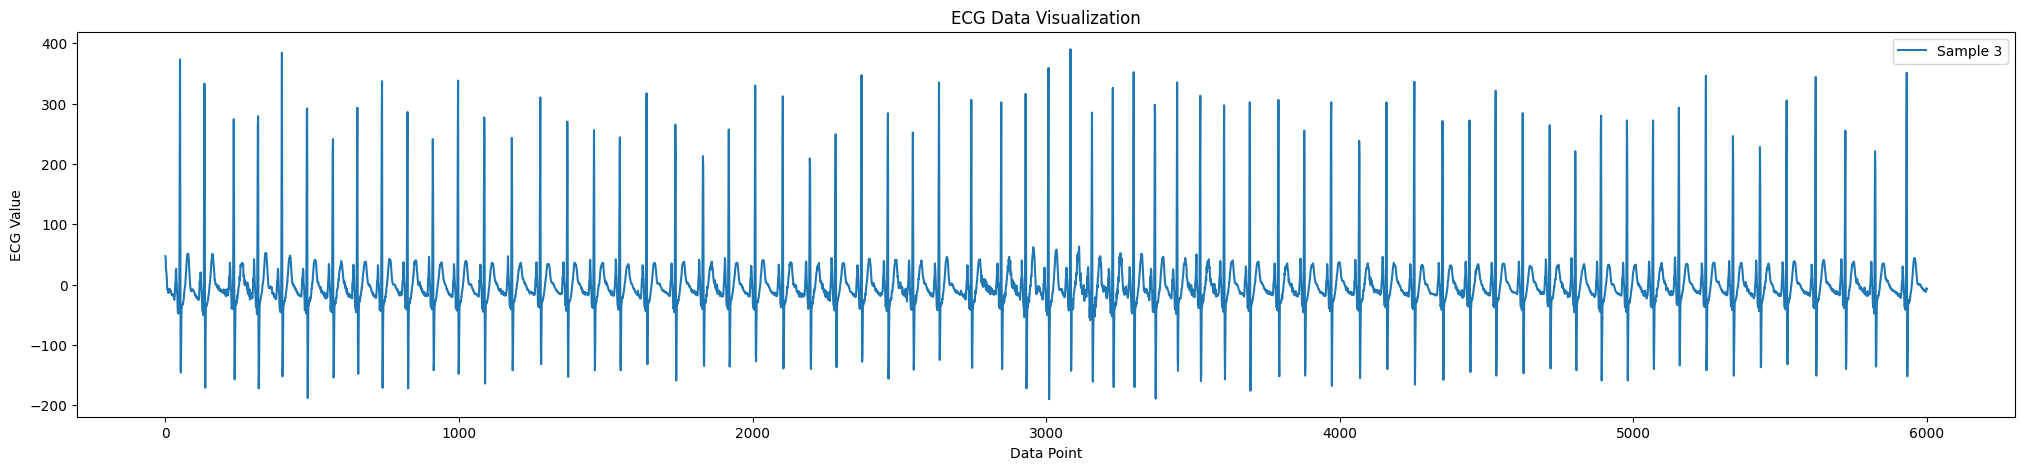

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 5))  # Set the figure size

sample_data = X[i, :-1]
plt.plot(sample_data, label=f'Sample {i+1}')

plt.title('ECG Data Visualization')
plt.xlabel('Data Point')
plt.ylabel('ECG Value')
plt.legend()
plt.show()


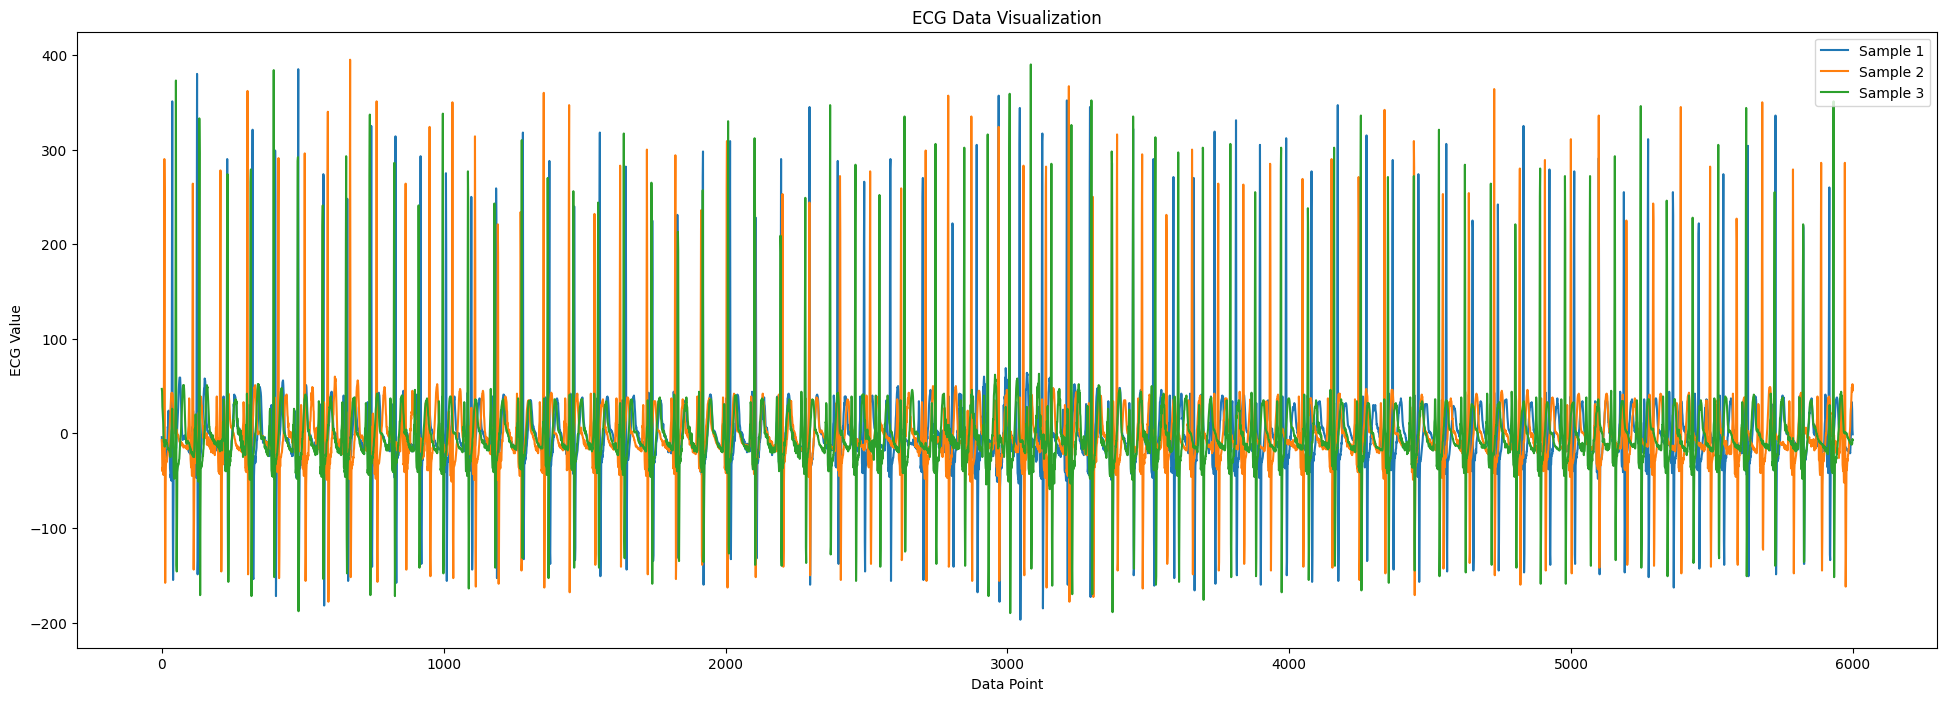

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(24, 8))

for i in range(3):
    sample_data = X[i, :-1]
    plt.plot(sample_data, label=f'Sample {i+1}')

plt.title('ECG Data Visualization')
plt.xlabel('Data Point')
plt.ylabel('ECG Value')
plt.legend()
plt.show()


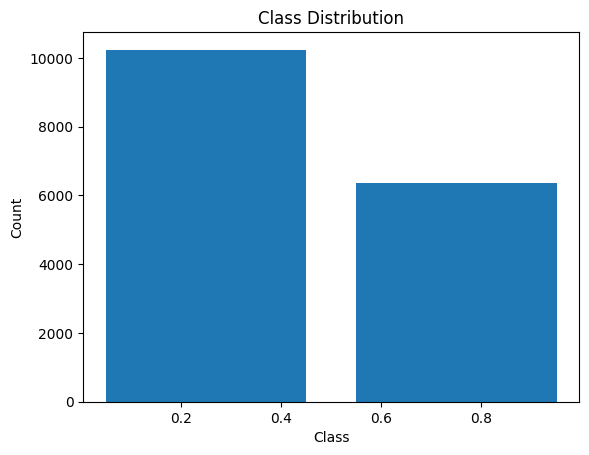

In [ ]:

plt.hist(y, bins=[0, 0.5, 1], align='mid', rwidth=0.8)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


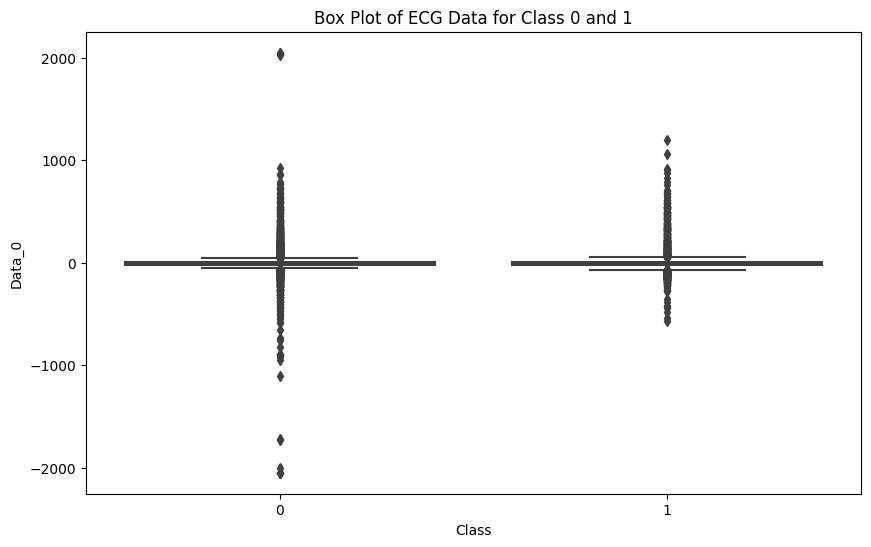

In [ ]:
import seaborn as sns

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(X[:, :-1], columns=[f'Data_{i}' for i in range(X.shape[1]-1)])
df['Class'] = y

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Data_0', data=df)
plt.title('Box Plot of ECG Data for Class 0 and 1')
plt.show()
